Reduced data after applying PCA:
Data Point 1: [4.305186922674707]
Data Point 2: [-3.7361286866113304]
Data Point 3: [-5.692827710560994]
Data Point 4: [5.123769474497617]


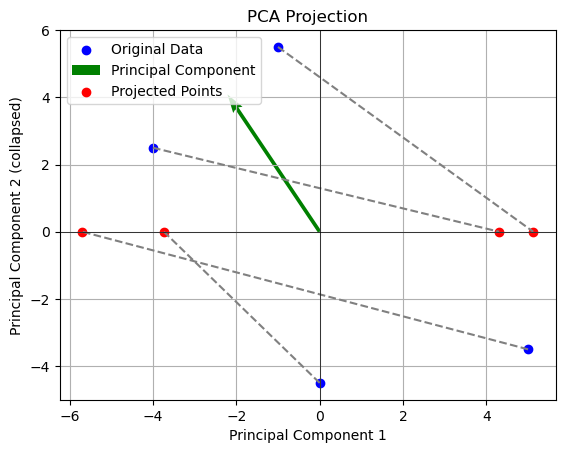

In [1]:
import math
import matplotlib.pyplot as plt

def standardize_data(X):
    means = []
    for i in range(len(X[0])): 
        column_mean = sum(row[i] for row in X) / len(X)
        means.append(column_mean)

    X_standardized = []
    for row in X:
        standardized_row = [(row[i] - means[i]) for i in range(len(row))]
        X_standardized.append(standardized_row)
    
    return X_standardized, means

def covariance_matrix(X_standardized):
    n_samples = len(X_standardized)
    n_features = len(X_standardized[0])
    
    cov_matrix = [[0] * n_features for _ in range(n_features)]
    
    for i in range(n_features):
        for j in range(n_features):
            cov_matrix[i][j] = sum(X_standardized[k][i] * X_standardized[k][j] for k in range(n_samples)) / (n_samples - 1)
    
    return cov_matrix

def matrix_mult(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def transpose_matrix(A):
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def norm(v):
    return math.sqrt(sum(x**2 for x in v))

def power_iteration(A, num_simulations=100):
    n, _ = len(A), len(A[0])
    b_k = [1] * n
    for _ in range(num_simulations):
        b_k1 = [sum(A[i][j] * b_k[j] for j in range(n)) for i in range(n)]
        b_k1_norm = norm(b_k1)
        b_k = [x / b_k1_norm for x in b_k1]
    eigenvalue = sum(b_k[i] * sum(A[i][j] * b_k[j] for j in range(n)) for i in range(n)) / sum(b_k[i]**2 for i in range(n))
    return eigenvalue, b_k

def select_top_k_components(eigenvalues, eigenvectors, k):
    eigenvalue_vector_pairs = sorted(zip(eigenvalues, eigenvectors), reverse=True)
    top_k_eigenvectors = [eigenvector for _, eigenvector in eigenvalue_vector_pairs[:k]]
    return top_k_eigenvectors

def project_data(X_standardized, top_k_eigenvectors):
    return matrix_mult(X_standardized, transpose_matrix(top_k_eigenvectors))

def pca(X, k):
    X_standardized, means = standardize_data(X)
    cov_matrix = covariance_matrix(X_standardized)
    eigenvalues = []
    eigenvectors = []
    for i in range(len(cov_matrix)):
        eigenvalue, eigenvector = power_iteration(cov_matrix)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
    top_k_eigenvectors = select_top_k_components(eigenvalues, eigenvectors, k)
    X_reduced = project_data(X_standardized, top_k_eigenvectors)
    return X_reduced, top_k_eigenvectors

def plot_projection(X, X_standardized, X_reduced, top_k_eigenvector):
    plt.scatter([row[0] for row in X_standardized], [row[1] for row in X_standardized], label='Original Data', color='blue')
    

    vector = top_k_eigenvector[0]
    origin = [0, 0]  
    plt.quiver(*origin, vector[0], vector[1], scale=3, color='green', label='Principal Component')

    plt.scatter([row[0] for row in X_reduced], [0 for _ in range(len(X_reduced))], color='red', label='Projected Points')

    for i in range(len(X_standardized)):
        plt.plot([X_standardized[i][0], X_reduced[i][0]], [X_standardized[i][1], 0], 'gray', linestyle='--')
    
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.title('PCA Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2 (collapsed)')
    plt.legend()
    plt.grid(True)
    plt.show()

X = [
    [4, 11],
    [8, 4],
    [13, 5],
    [7, 14]
]

k = 1
X_reduced, top_k_eigenvector = pca(X, k)

print("Reduced data after applying PCA:")
for i, row in enumerate(X_reduced):
    print(f"Data Point {i + 1}: {row}")

X_standardized, _ = standardize_data(X)

plot_projection(X, X_standardized, X_reduced, top_k_eigenvector)
